# Hãy hoàn thành yêu cầu sau đây

Bài 1: Cho tập ảnh như trong thư mực 'images/*.*'. Ảnh có 2 đồ vật được xếp ở vị trí bât kỳ trên mặt phẳng. Hãy tính góc tạo bởi hai đồ vật này. Code cần được comment đầy đủ, giải thích ý đồ ở từng phần. Học viên nên hiển thị kết quả trung gian để minh họa tính đúng đắn ở mỗi giai đoạn.
- Bước 1: Học viên có thể sử dụng các bộ tham số khác nhau cho từng ảnh.
- Bước 2: Hãy chọn bộ tham số phù hợp cho tất cả các ảnh trên.

Có nhiều cách để giải bài toán này. Một trong những ý tưởng để thực hiện bài toán này là:
- Thực hiện việc phát hiện biên và đường thẳng qua các thuật toán đã học
- Gom nhóm các góc thành 2 nhóm tương ứng với 2 đối tượng trên ảnh
- Tính toán góc giữa 2 vật thể và đưa ra góc cũng như thông báo có song song với nhau hay không.

In [2]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import glob
import os

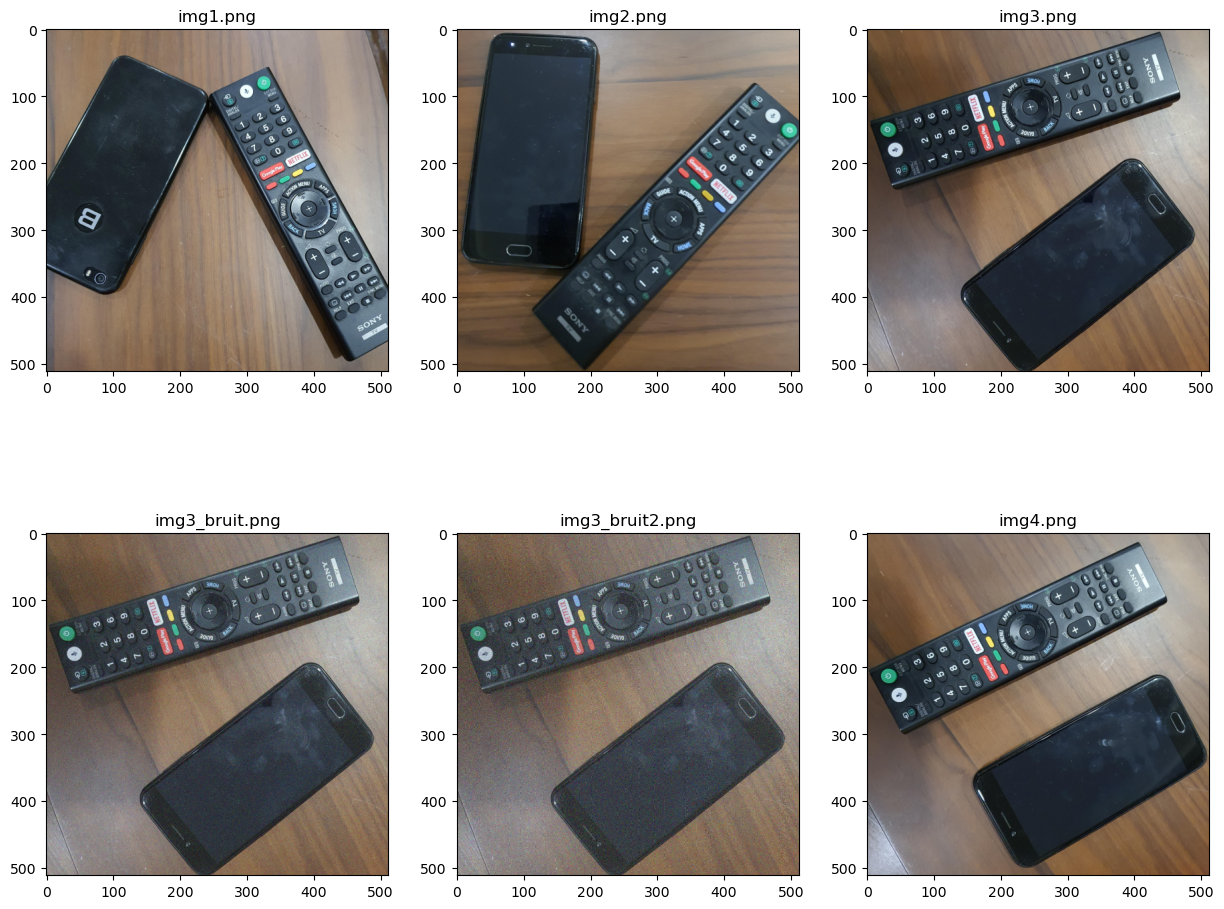

In [3]:
## Đọc ảnh 
images=glob.glob('images/*.png')
column=3
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,12))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))
plt.show() 

In [10]:
def detect_edge(img_path, blur_ksize = 5, threshold1 = 20, threshold2 = 200):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(img_gray, (blur_ksize, blur_ksize), 0)
    img_edge = cv2.Canny(img_gaussian, threshold1, threshold2)
    return img_edge

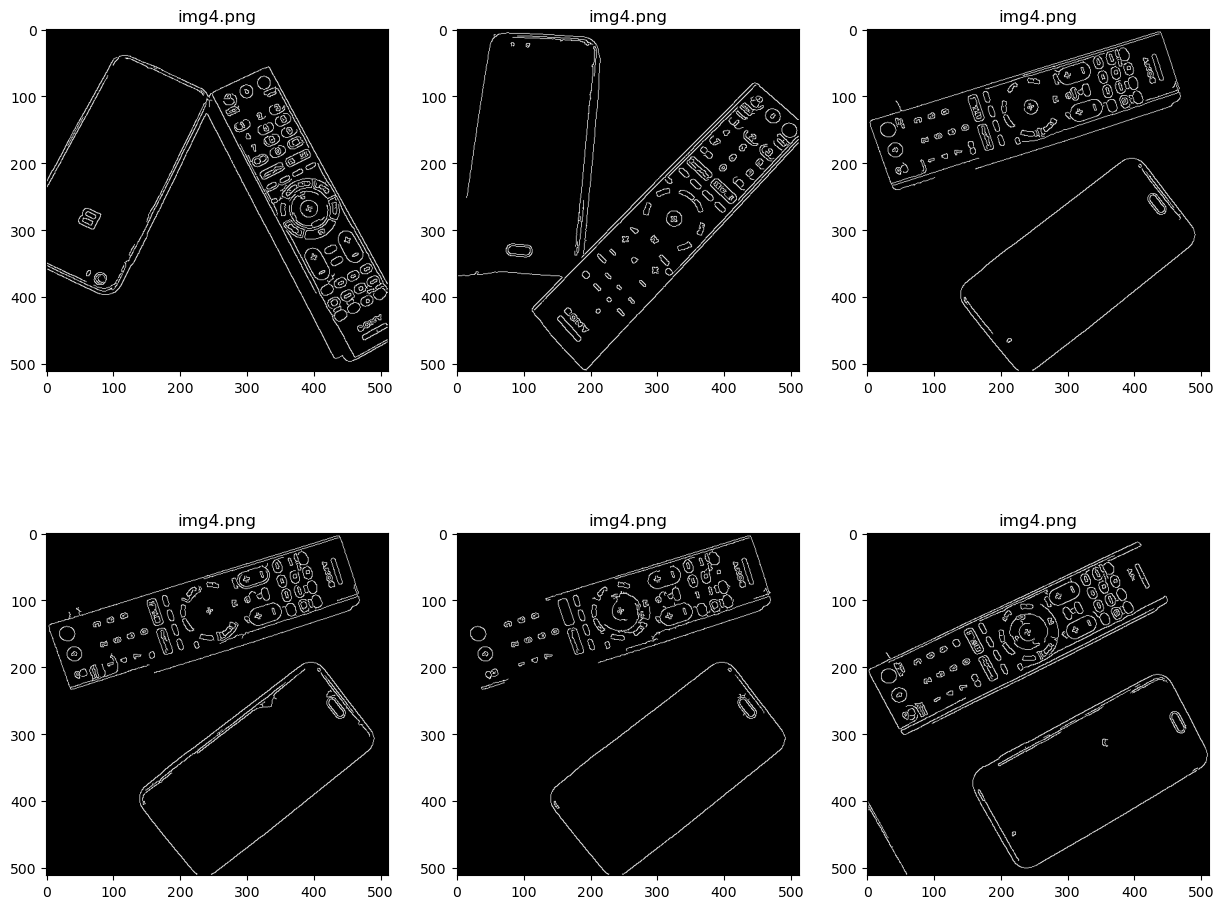

In [11]:
images=glob.glob('images/*.png')
column=3
row=int(math.ceil(len(images)/column))
plt.figure(figsize=(15,12))
for i, path in enumerate(images):
    img = detect_edge(path)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))
plt.show() 

In [18]:
### Hàm trả ra góc giữa 2 object
def angle_between_objects(img_path, threshold = 0.1, check_parallel = True):
    img_edge = detect_edge(img_path)
    lines = cv2.HoughLines(img_edge, 1, np.pi/180, 150, None, 0, 0)
    # print(lines)
    lines_obj1 =[]
    lines_obj2 = []
    if lines is not None:
        for i in range(0, len(lines)):
            if i == 0: lines_obj1.append(lines[i][0][1])
            else:
                if np.abs(lines[i][0][1]- lines_obj1[0]) > threshold:
                    lines_obj2.append(lines[i][0][1])
                else: lines_obj1.append(lines[i][0][1])
    
    print(lines_obj1)
    print(lines_obj2)

    if check_parallel:
        if len(lines_obj2) == 0:
            print("Parallel")
            return True
        return False
    
    if len(lines_obj2) == 0:  return 0 
    angle = np.round((np.abs(np.mean(lines_obj1)-np.mean(lines_obj2))*180/np.pi), 1)
    print('Angle:', angle)
    if angle < 90:
        return int(angle)
    return int(180 - int(angle))

[2.6354473, 2.6529005, 2.6529005, 2.6529005, 2.6703537, 2.6354473, 2.6703537, 2.6529005]
[0.4537856, 0.47123888, 0.5061455, 0.5061455, 0.4537856]
Angle: 124.6
[0.75049156, 0.7853982, 0.7853982, 0.7679449, 0.75049156, 0.80285144, 0.7330383, 0.7330383]
[0.08726646]
Angle: 38.8
[1.2740903, 1.2566371, 1.2566371]
[0.8901179, 0.9075712, 0.9250245]
Angle: 20.3
[1.2740903, 1.2566371, 1.2566371]
[0.8901179, 0.9075712, 0.9075712, 0.9250245]
Angle: 20.3
[0.8901179, 0.9075712, 0.9250245]
[1.2566371, 1.2740903]
Angle: 20.5
[1.0995574, 1.134464, 1.0995574, 1.1170107, 1.0995574, 1.0821041, 1.0297443, 1.134464, 1.1170107, 1.1170107, 1.1519173]
[]


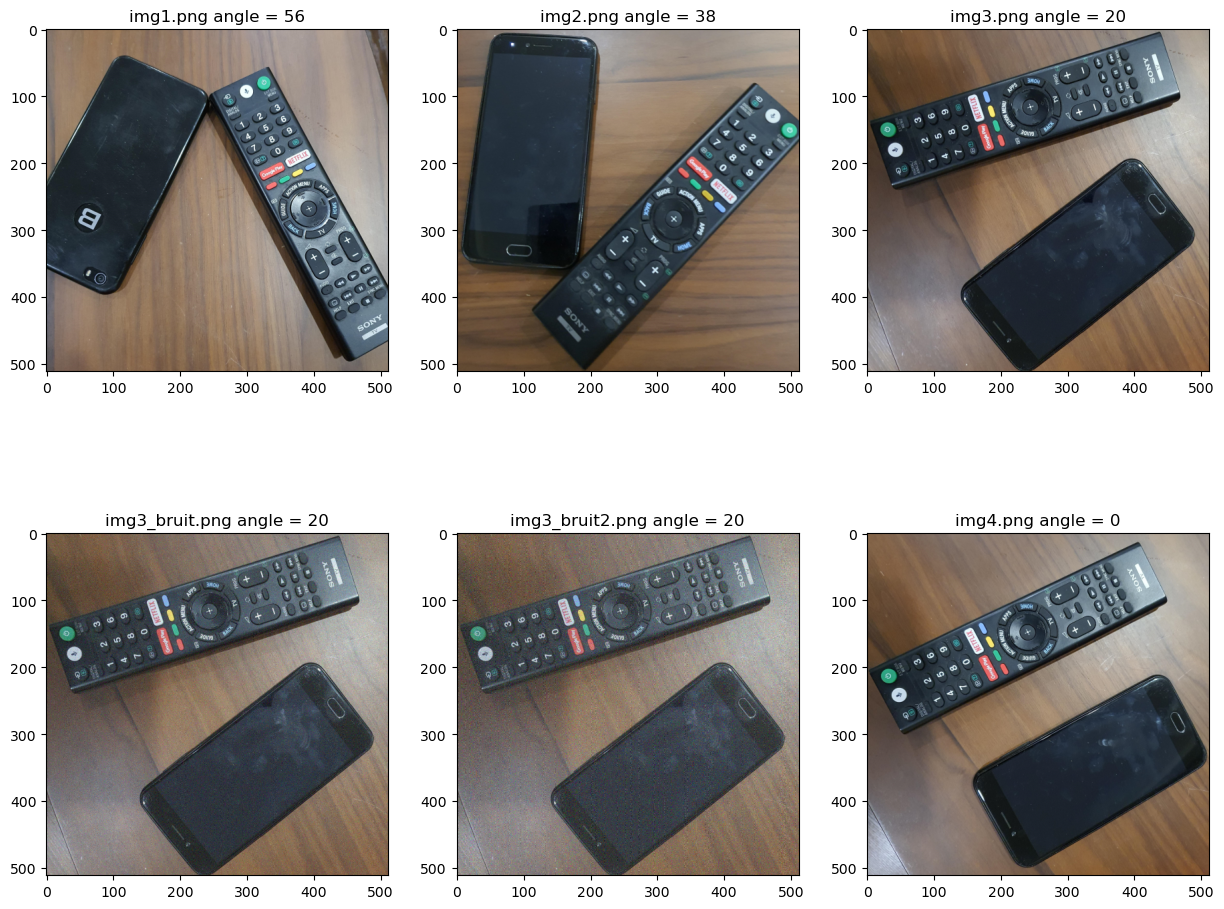

In [19]:
images=glob.glob('images/*.png')
column=3
row=int(math.ceil(len(images)/column))
plt.figure(figsize=(15,12))
for i,fname in enumerate(images):
    angle = angle_between_objects(fname, check_parallel=False) #YOUR CODE HERE
    plt.subplot(row,column,i+1)
    img=cv2.imread(fname)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname) + ' angle = ' + str(angle))
plt.show() 